In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model

rcParams.update({'font.size': 18})

## 1. Same data, 4 regression realizations, 4 different results

In this part, we demonstrate that although the data point is the same, the regression method is the same. When there are little noise in the measurement, we can still having different regression result. 

The variability in the results comes from the noise that is added to the function values, not from the data points or the regression method itself.

Here, we realize 4 different regression trials, with different random seeds of generating white noise over the location of data points. 

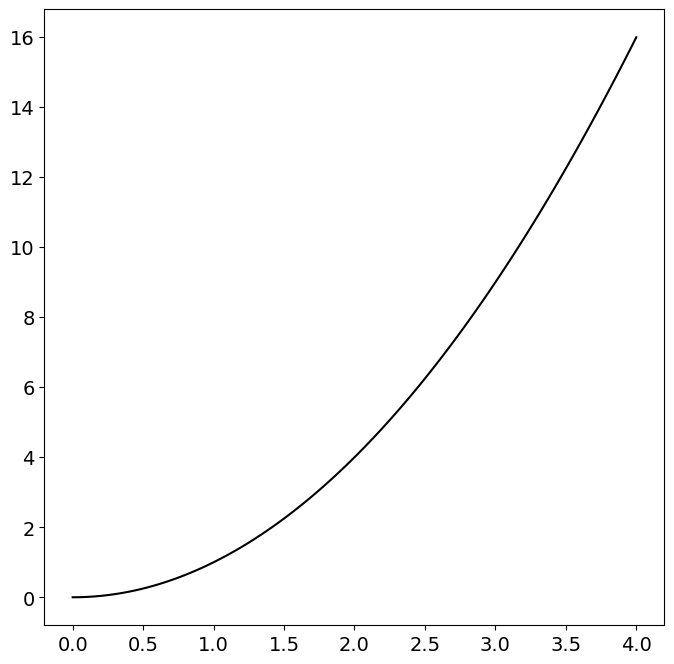

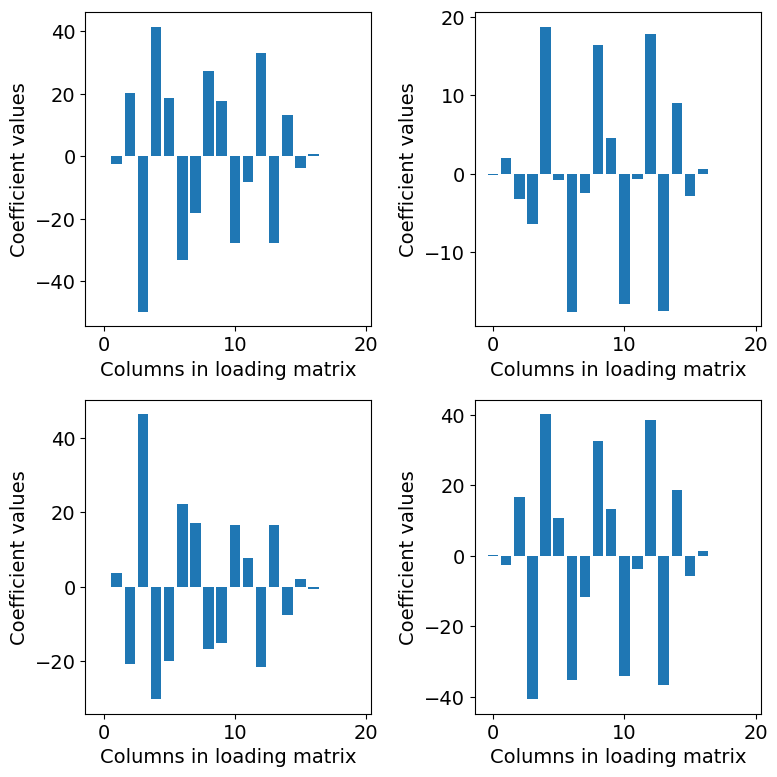

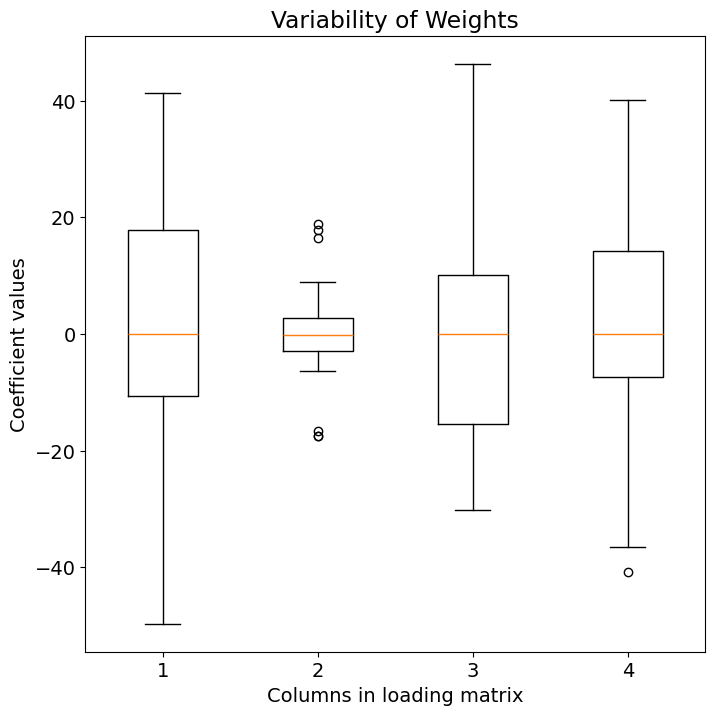

In [12]:
n = 100  # Number of data points
L = 4    # Length of the interval [0, L]
x = np.linspace(0, L, n)  # Generate 'n' evenly spaced points between 0 and L
f = np.power(x, 2)  # Compute the corresponding values of the function f(x) = x^2

M = 20  # Polynomial degree for the regression model

phi = np.zeros((n,M))  # Initialize a matrix phi of size (n, M) with zeros
for j in range(M):
    phi[:,j] = np.power(x,j) # Fill the matrix phi with powers of x to create the feature matrix A
    
plt.figure()
plt.plot(x,f,color='k')
    
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1) # Reshape the subplot array to 1D for easier iteration

all_coefficients = []  # A list to store all coefficients for each iteration

# create 4 subplots that show the loadings (coefficient) for various polynomial coefficients for 4 different noise realizations.
 
# 1. polynomial with noise
# 2. least sqaures fit 
# 3. predicted values using the regression coefficients and feature matrix (from least squares fit)
for j in range(4):
    fn = np.power(x,2) + 0.1*np.random.randn(*x.shape)
    
    # Coefficients for the polynomial regression model from least-square fit. 
    # Using the pseudo-inverse of A and target values to compute the coefficients
    an = np.linalg.pinv(phi) @ fn 
    fna = phi @ an # Compute the predicted values using the regression coefficients and feature matrix
    
    all_coefficients.append(an) # Store the coefficients in the list
    
    # Calculate the relative L2 norm error
    En = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
    axs[j].bar(range(len(an)),an)
    axs[j].set_xlabel("Columns in loading matrix")
    axs[j].set_ylabel("Coefficient values")  # Changed from "Relative L2 norm error" to "Coefficient values"

plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area.

# Create a box plot of the coefficients, that shows the variability of the coefficients for each column of the weights matrix
plt.figure()

# Transpose the array so that each boxplot corresponds to a column of the weights matrix
# Why it works?

plt.boxplot(np.array(all_coefficients).T)  
plt.xlabel("Columns in loading matrix")
plt.ylabel("Coefficient values")
plt.title("Variability of Weights")

plt.show()

Now, we try to apply 6 different regression method. And try to visualize the variability as well. 

Setup:
1. Generate 100 polynomial curve, with different noise random seed.
2. Plot boxplot for weight matrix for each regression method, to visualize the variability. 

c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+01, tolerance: 2.315e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.615e+00, tolerance: 2.315e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

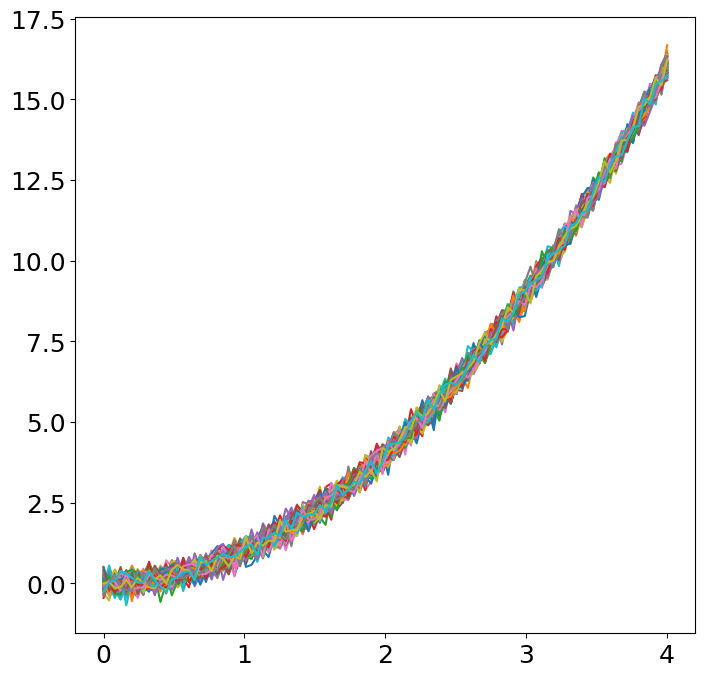

In [8]:
## Different regressions
plt.figure()
plt.plot(x,f,color='k')

lam = 0.1
phi2 = phi[:,1:]
E1 = np.zeros(100)
E2 = np.zeros(100)
E3 = np.zeros(100)
E4 = np.zeros(100)
E5 = np.zeros(100)
E6 = np.zeros(100)

A1 = np.zeros((M,100))
A2 = np.zeros((M,100))
A3 = np.zeros((M,100))
A4 = np.zeros((M,100))
A5 = np.zeros((M,100))
A6 = np.zeros((M,100))

for jj in range(100):
# for jj in range(10):
    f = np.power(x,2)+0.2*np.random.randn(n)
    
    a1 = np.linalg.pinv(phi) @ f
    f1 = phi @ a1
    E1[jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
    
    a2 = np.linalg.lstsq(phi,f,rcond=None)[0]
    f2 = phi @ a2
    E2[jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
    
    regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr3.fit(phi, f)  
    a3 = regr3.coef_
    f3 = phi @ a3
    E3[jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
    
    regr4 = linear_model.ElasticNet(alpha=0.8, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr4.fit(phi, f)  
    a4 = regr4.coef_
    f4 = phi @ a4
    E4[jj] = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)
    
    huber = linear_model.HuberRegressor().fit(phi, f) # matlab's robustfit() does not have an exact sklearn analogue
    a5 = huber.coef_
    f5 = phi @ a5
    E5[jj] = np.linalg.norm(f-f5,ord=2)/np.linalg.norm(f,ord=2)

    ridge = linear_model.Ridge(alpha=1.0).fit(phi,f)
    a6 = ridge.coef_
    f6 = phi @ a6
    E6[jj] = np.linalg.norm(f-f6,ord=2)/np.linalg.norm(f,ord=2)

    
    A1[:,jj] = a1
    A2[:,jj] = a2
    A3[:,jj] = a3
    A4[:,jj] = a4
    A5[:,jj] = a5
    A6[:,jj] = a6

    plt.plot(x,f)
    
Err = np.column_stack((E1,E2,E3,E4,E5,E6))
Err2 = np.column_stack((E1,E2,E3,E4,E5))

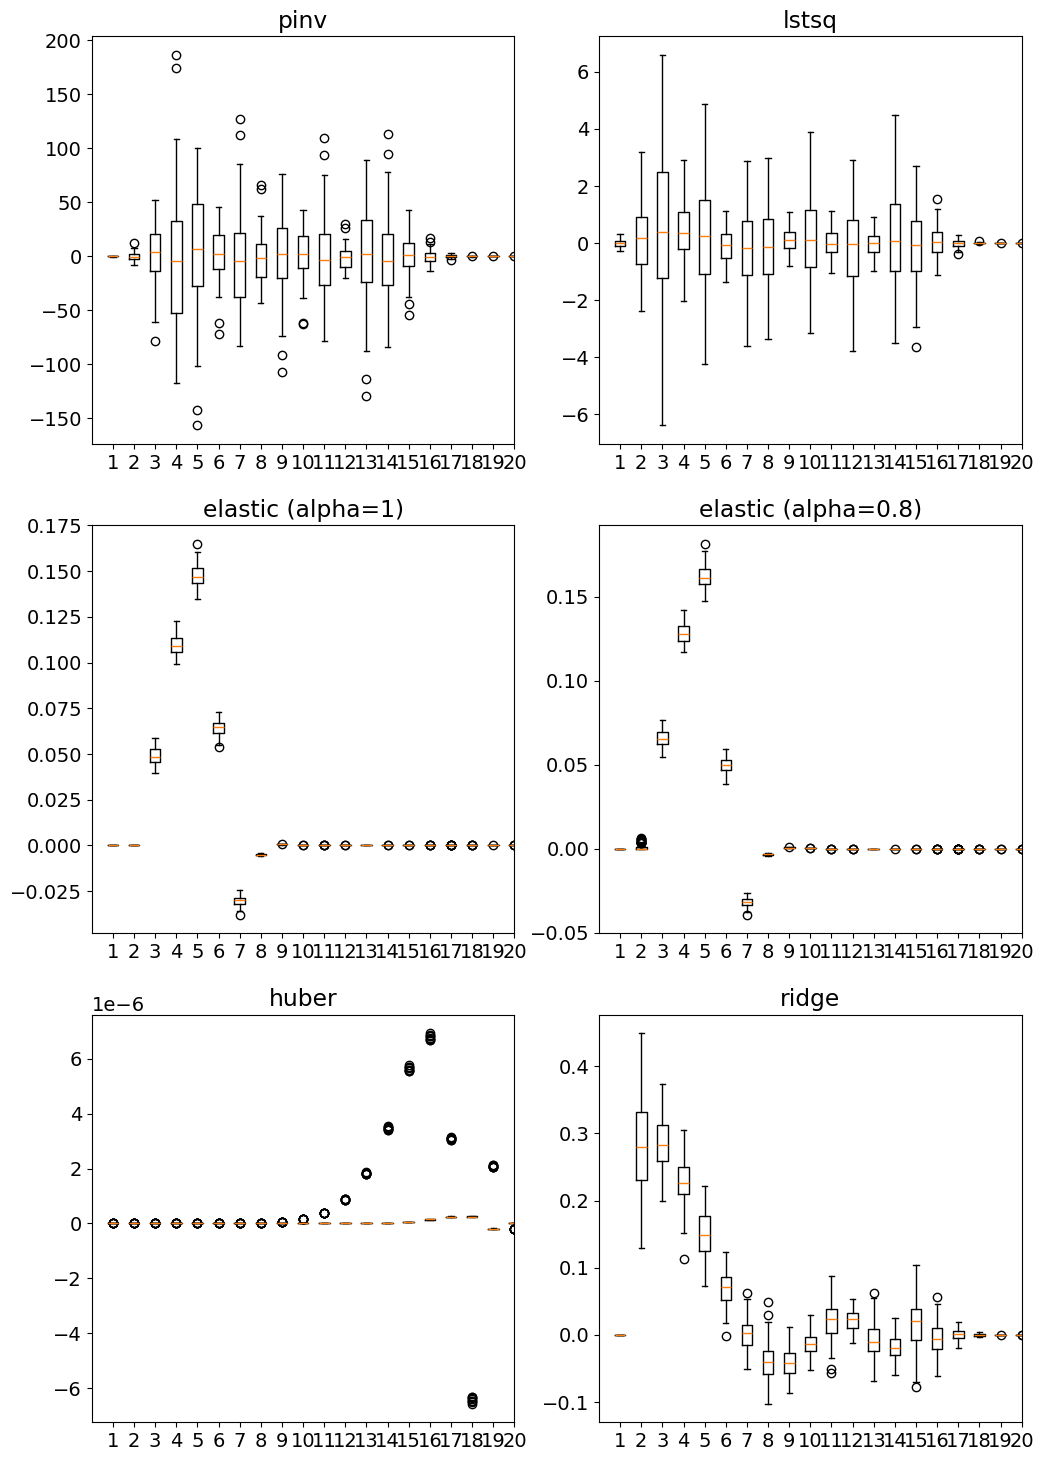

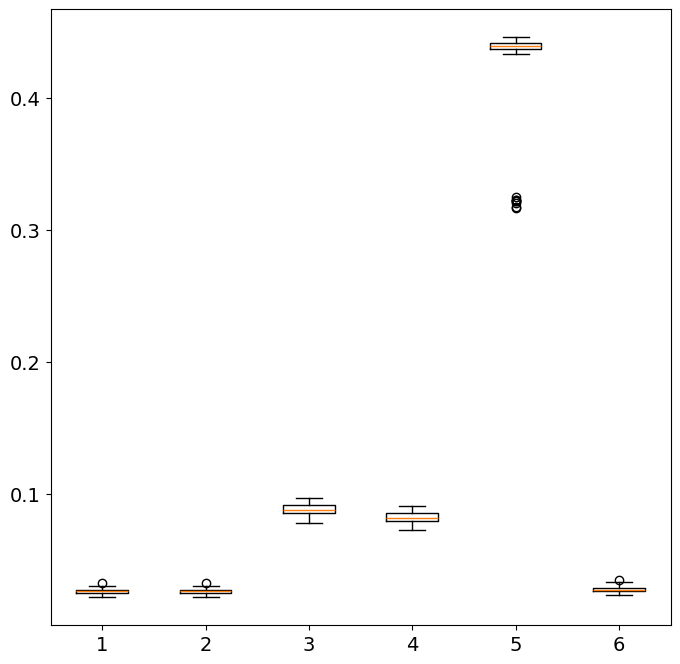

In [9]:
plt.rcParams['figure.figsize'] = [12, 18]
rcParams.update({'font.size': 14})
fig,axs = plt.subplots(3,2)
axs = axs.reshape(-1)

axs[0].boxplot(A1.T)
axs[0].set_title('pinv')
axs[1].boxplot(A2.T)
axs[1].set_title('lstsq')
axs[2].boxplot(A3.T)
axs[2].set_title('elastic (alpha=1)')
axs[3].boxplot(A4.T)
axs[3].set_title('elastic (alpha=0.8)')
axs[4].boxplot(A5.T)
axs[4].set_title('huber')
axs[5].boxplot(A6.T)
axs[5].set_title('ridge')

for ax in axs:
    ax.set_xlim(0,M)
    
plt.rcParams['figure.figsize'] = [8, 8]

plt.figure()
plt.boxplot(Err)

plt.show()

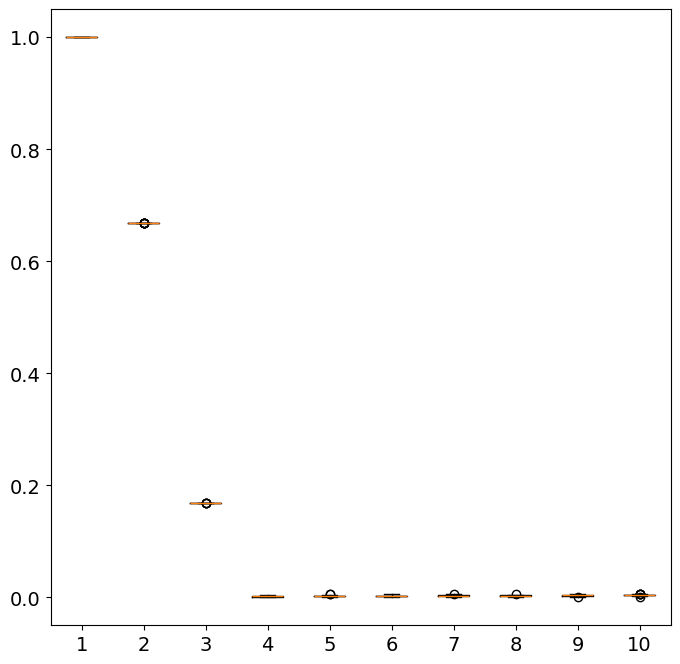

In [10]:
M = 10
En = np.zeros((100,M))
phi = np.zeros((len(x),M))
for jj in range(M):
    for j in range(jj):
        phi[:,j] = np.power(x,j)
    f = np.power(x,2)
    for j in range(100):
        fn = np.power(x,2) + 0.1*np.random.randn(n)
        an = np.linalg.pinv(phi) @ fn
        fna = phi @ an
        En[j,jj] = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
        
plt.boxplot(En)

plt.show()